In [1]:
from scipy.linalg import eigh
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def load_and_center_dataset(filename):
    ds = np.load(filename)
    ds = ds - np.mean(ds, axis=0)
    return ds

x = load_and_center_dataset('YaleB_32x32.npy')
print(x.shape)
print(len(x[0]))
np.average(x)

(2414, 1024)
1024


-8.315174931741023e-17

In [3]:
def get_covariance(dataset):
    return np.dot(dataset.T, dataset) / (dataset.shape[0] - 1)

cov = get_covariance(x)
print(cov.shape)

(1024, 1024)


In [4]:
def get_eig(S, m):
    eigvals, eigvecs = eigh(S, subset_by_index=[S.shape[0] - m, S.shape[0] - 1])
    # Return the largest m eigenvalues as a diagonal matrix in reversed order
    eigvals = np.diag(eigvals[::-1])
    # reverse the order of the eigenvectors since the eigenvalues are in reversed order
    eigvecs = eigvecs[:, ::-1]
    return eigvals, eigvecs

eigvals, eigvecs = get_eig(cov, 2)
print(eigvals)
print(eigvecs)

[[1369142.41612494       0.        ]
 [      0.         1341168.50476773]]
[[-0.01304065 -0.0432441 ]
 [-0.01177219 -0.04342345]
 [-0.00905278 -0.04095089]
 ...
 [ 0.00148631  0.03622013]
 [ 0.00205216  0.0348093 ]
 [ 0.00305951  0.03330786]]


In [5]:
def get_eig_prop(S, prop):
    # sum of all eigenvalues, calculate the proportion of variance limit
    proportion_of_variance = np.sum(eigh(S, eigvals_only=True)) * prop
    # recalculate eigenvalues and eigenvectors limited by the proportion of variance
    eigvals, eigvecs = eigh(S, subset_by_value=[proportion_of_variance, np.inf])
    # Return the largest m eigenvalues as a diagonal matrix in reversed order
    eigvals = np.diag(eigvals[::-1])
    # reverse the order of the eigenvectors since the eigenvalues are in reversed order
    eigvecs = eigvecs[:, ::-1]
    return eigvals, eigvecs

eigvals, eigvecs = get_eig_prop(cov, 0.07)
print(eigvals)
print(eigvecs)

[[1369142.41612494       0.        ]
 [      0.         1341168.50476773]]
[[-0.01304065 -0.0432441 ]
 [-0.01177219 -0.04342345]
 [-0.00905278 -0.04095089]
 ...
 [ 0.00148631  0.03622013]
 [ 0.00205216  0.0348093 ]
 [ 0.00305951  0.03330786]]


In [6]:
def project_image(image, U):
    # calculate the projection of the image onto the eigenvectors
    projection = np.dot(np.transpose(U), image)
    # reconstruct the image from the projection
    reconstruction = np.dot(projection, U.T)
    return reconstruction

image = x[0]
eigvals, eigvecs = get_eig(cov, 2)
reconstruction = project_image(x[0], eigvecs)
print(reconstruction)

[6.84122225 4.83901287 1.41736694 ... 8.75796534 7.45916035 5.4548656 ]


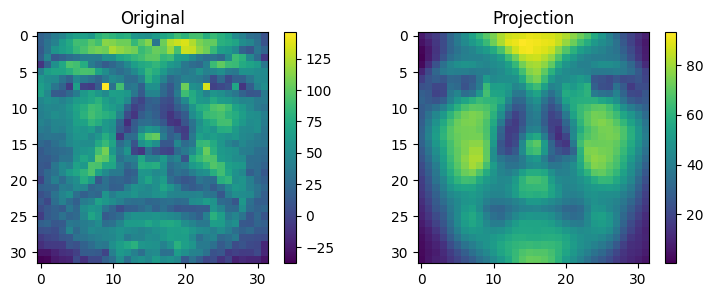

In [7]:
def display_image(orig, proj):
    # reshape the original image and the projection
    orig = np.transpose(orig.reshape(32, 32))
    proj = np.transpose(proj.reshape(32, 32))

    # plot the original image and the projection
    fig, (ax1, ax2) = plt.subplots(figsize=(9,3), ncols=2)
    ax1_pos = ax1.imshow(orig, cmap='viridis', aspect='equal')
    ax1.set_title('Original')
    ax2_pos = ax2.imshow(proj, cmap='viridis', aspect='equal')
    ax2.set_title('Projection')
    fig.colorbar(ax1_pos)
    fig.colorbar(ax2_pos)
    return fig, ax1, ax2

x = load_and_center_dataset('YaleB_32x32.npy')
S = get_covariance(x)
Lambda, U = get_eig(S, 2)
projection = project_image(x[0], U)
fig, ax1, ax2 = display_image(x[0], projection)
plt.show()